In [1]:
import pyrootutils
from pathlib import Path

# Point to your repo root manually
root = pyrootutils.setup_root(
    Path().resolve().parent,  # current working dir
    project_root_env_var=True,
    dotenv=True,
    pythonpath=True,
    cwd=False,
)

In [2]:
!pip install pandas openpyxl

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file_path = "Baseline runs (no synthetic data) (1).xlsx"
baseline_runs_df = pd.read_excel(file_path, engine="openpyxl")
baseline_runs_df.head()

,Run Type,run_id,model,val/f1,val/specificity,val/rec,va/balanced_acc,test/f1,test/specificify,test/rec,test/balanced_acc
0,Densenet baseline (no synthetic data),hxgjenmk,densenet201,0.848485,0.357143,0.965517,0.661330,0.835821,0.333333,0.965517,0.649425
1,ISIC2019 baseline (no synthetic data),lzh6cqwh,isic2019_effnetb6,0.830769,0.357143,0.931035,0.644089,0.805556,0.066667,1.000000,0.533333


In [5]:
file_path = "Synthetic data runs (1).xlsx"
synthetic_runs_df = pd.read_excel(file_path, engine="openpyxl")
synthetic_runs_df.head()

,Dataset,SAM_mean,SAM_std,RASE_mean,RASE_std,PSNR_mean,PSNR_std,SSIM_mean,SSIM_std,TV_mean,...,model,best_step,val/f1,val/specificity,val/rec,va/balanced_acc,test/f1,test/specificify,test/rec,test/balanced_acc
0,hsi_dermoscopy_croppedv2_256_synth_fsgan,0.244278,0.043153,4060.050110,772.176355,13.928331,1.239069,0.642179,0.042221,69095.78027,...,isic2019_effnetb6,134.0,0.862069,0.714286,0.862069,0.788177,0.843750,0.466667,0.931035,0.698851
1,hsi_dermoscopy_croppedv2_256_synth_fsgan_pretr...,0.225471,0.039058,3314.361487,481.032029,12.872177,1.507934,0.651518,0.038814,69787.14180,...,isic2019_effnetb6,20.0,0.821429,0.714286,0.793103,0.753695,0.781250,0.333333,0.862069,0.597701
2,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan,0.253011,0.031637,4272.189270,448.691614,12.813588,1.959416,0.666892,0.041194,54943.26221,...,isic2019_effnetb6,16.0,0.900000,0.714286,0.931035,0.822660,0.830769,0.400000,0.931035,0.665517
3,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan...,0.219326,0.030917,3386.864723,704.884678,12.869754,2.391343,0.662298,0.042146,69771.11328,...,isic2019_effnetb6,18.0,0.881356,0.714286,0.896552,0.805419,0.830769,0.400000,0.931035,0.665517
4,hsi_dermoscopy_croppedv2_256_synth_ac_cyclegan,0.186673,0.056201,4033.053118,1098.594013,14.510313,1.269291,0.639081,0.028402,170068.16880,...,isic2019_effnetb6,16.0,0.852459,0.571429,0.896552,0.733990,0.838710,0.533333,0.896552,0.714943


In [ ]:
k = 5
synthetic_runs_clean = synthetic_runs_df.dropna(subset=["test/f1"])
top_k_runs = synthetic_runs_clean.sort_values(by="test/f1", ascending=False).head(k)
# sort top_k runs order by test/balanced_acc
top_k_runs = top_k_runs.sort_values(by="test/balanced_acc", ascending=False)
top_k_runs

,Dataset,SAM_mean,SAM_std,RASE_mean,RASE_std,PSNR_mean,PSNR_std,SSIM_mean,SSIM_std,TV_mean,...,model,best_step,val/f1,val/specificity,val/rec,va/balanced_acc,test/f1,test/specificify,test/rec,test/balanced_acc
6,hsi_dermoscopy_cropped_synth_beta_vae,0.102372,0.112184,5614.508850,1221.136884,12.243149,1.085842,0.410965,0.056497,426366.31640,...,densenet201,64.0,0.885246,0.462963,1.000000,0.731481,0.877193,0.615385,0.925926,0.770655
4,hsi_dermoscopy_croppedv2_256_synth_ac_cyclegan,0.186673,0.056201,4033.053118,1098.594013,14.510313,1.269291,0.639081,0.028402,170068.16880,...,isic2019_effnetb6,16.0,0.852459,0.571429,0.896552,0.733990,0.838710,0.533333,0.896552,0.714943
0,hsi_dermoscopy_croppedv2_256_synth_fsgan,0.244278,0.043153,4060.050110,772.176355,13.928331,1.239069,0.642179,0.042221,69095.78027,...,isic2019_effnetb6,134.0,0.862069,0.714286,0.862069,0.788177,0.843750,0.466667,0.931035,0.698851
3,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan...,0.219326,0.030917,3386.864723,704.884678,12.869754,2.391343,0.662298,0.042146,69771.11328,...,isic2019_effnetb6,18.0,0.881356,0.714286,0.896552,0.805419,0.830769,0.400000,0.931035,0.665517
2,hsi_dermoscopy_croppedv2_256_synth_spade_fsgan,0.253011,0.031637,4272.189270,448.691614,12.813588,1.959416,0.666892,0.041194,54943.26221,...,isic2019_effnetb6,16.0,0.900000,0.714286,0.931035,0.822660,0.830769,0.400000,0.931035,0.665517


Plot created: sam_comparison_top3_best_worst_vs_all.png


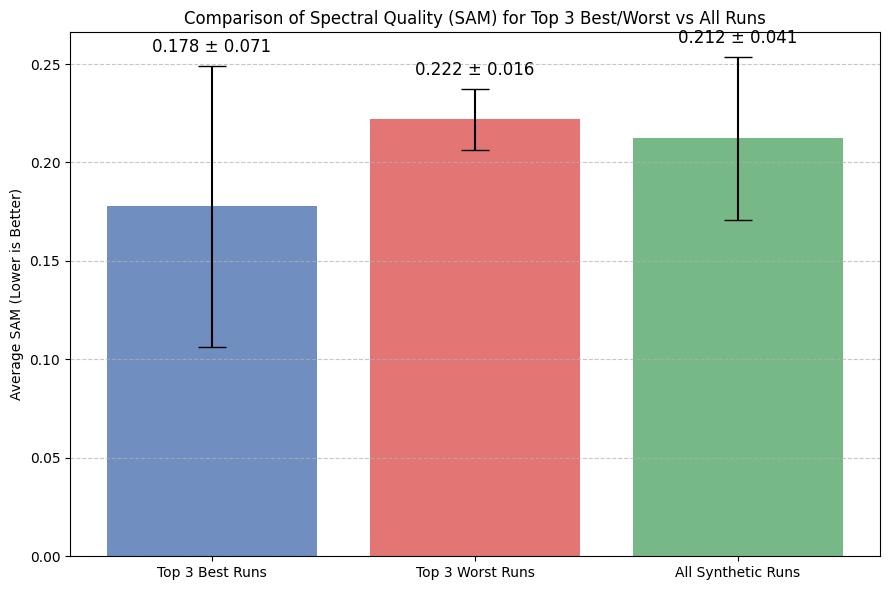

In [18]:
# Reload data just in case (though context preserves it, good practice for standalone snippets)
synthetic_runs_clean = synthetic_runs_df.dropna(subset=["test/f1"])

# Identify top k best and worst runs based on 'test/f1'
k = 3
top_k_runs = synthetic_runs_clean.sort_values(by="test/f1", ascending=False).head(k)
worst_k_runs = synthetic_runs_clean.sort_values(by="test/f1", ascending=True).head(k)

# Calculate statistics for Top k (best)
top_k_mean = top_k_runs["SAM_mean"].mean()
top_k_std = top_k_runs["SAM_mean"].std()

# Calculate statistics for Worst k
worst_k_mean = worst_k_runs["SAM_mean"].mean()
worst_k_std = worst_k_runs["SAM_mean"].std()

# Calculate statistics for All Runs
all_runs_mean = synthetic_runs_clean["SAM_mean"].mean()
all_runs_std = synthetic_runs_clean["SAM_mean"].std()

# Data for plotting
categories = [f"Top {k} Best Runs", f"Top {k} Worst Runs", "All Synthetic Runs"]
means = [top_k_mean, worst_k_mean, all_runs_mean]
stds = [top_k_std, worst_k_std, all_runs_std]
colors = ["#4c72b0", "#dd5252", "#55a868"]

# Plotting
plt.figure(figsize=(9, 6))
bars = plt.bar(categories, means, yerr=stds, capsize=10, color=colors, alpha=0.8)

# Add labels and title
plt.ylabel("Average SAM (Lower is Better)")
plt.title(f"Comparison of Spectral Quality (SAM) for Top {k} Best/Worst vs All Runs")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add text labels for the values
for bar, mean, std in zip(bars, means, stds):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        mean + std + 0.005,
        f"{mean:.3f} ± {std:.3f}",
        ha="center",
        va="bottom",
        fontsize=12,
    )

plt.tight_layout()
plt.savefig("sam_comparison_top3_best_worst_vs_all.png")
print("Plot created: sam_comparison_top3_best_worst_vs_all.png")

DenseNet Baseline: [0.83582091 0.33333334 0.96551722 0.64942528]
DenseNet Best: [0.87719297 0.61538464 0.92592591 0.77065527]
EffNet Baseline: [0.80555558 0.06666667 1.         0.53333334]
EffNet Best: [0.83870965 0.53333336 0.89655173 0.71494254]


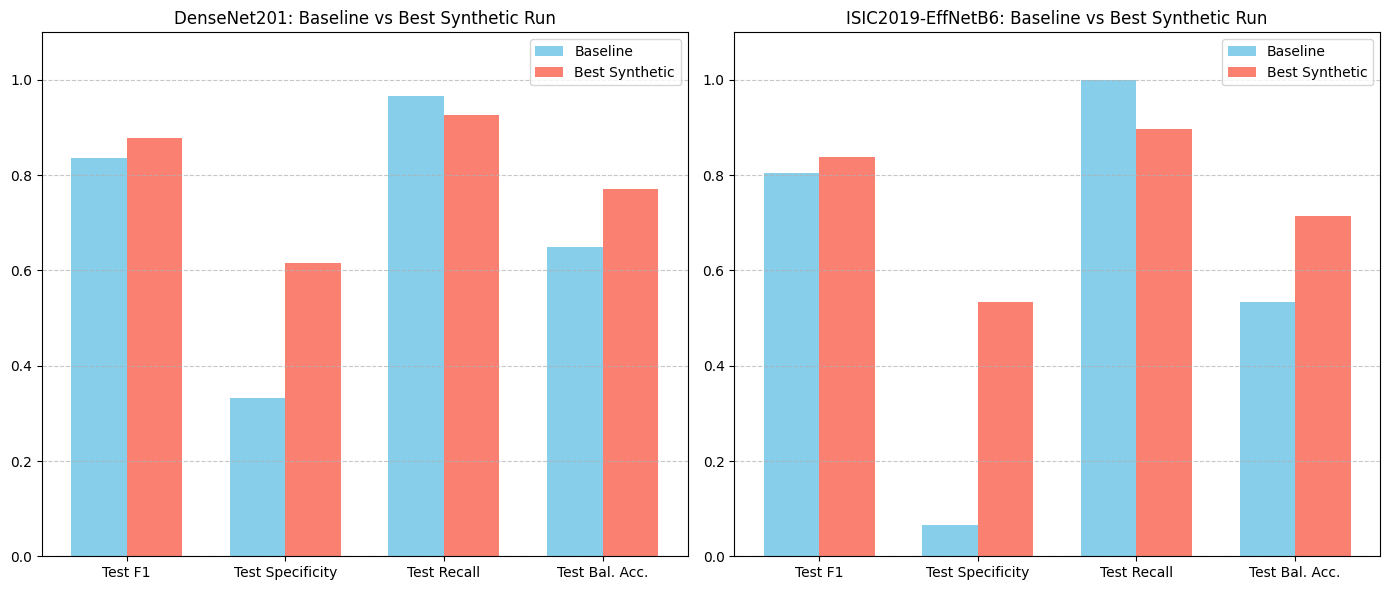

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
models = ['DenseNet201', 'EfficientNetB6']
metrics = ['Test F1', 'Test Specificity', 'Test Recall', 'Test Bal. Acc.']

# Extracting values
# Densenet
df = pd.concat([baseline_runs_df, synthetic_runs_df], ignore_index=True)
dense_base = df[df['run_id'] == 'hxgjenmk'][['test/f1', 'test/specificify', 'test/rec', 'test/balanced_acc']].values.flatten()
dense_best = df[df['run_id'] == 'rpxuujz1'][['test/f1', 'test/specificify', 'test/rec', 'test/balanced_acc']].values.flatten()

# Effnet
eff_base = df[df['run_id'] == 'lzh6cqwh'][['test/f1', 'test/specificify', 'test/rec', 'test/balanced_acc']].values.flatten()
eff_best = df[df['run_id'] == 'j6kdgk6h'][['test/f1', 'test/specificify', 'test/rec', 'test/balanced_acc']].values.flatten()

x = np.arange(len(metrics))
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Densenet
axs[0].bar(x - width/2, dense_base, width, label='Baseline', color='skyblue')
axs[0].bar(x + width/2, dense_best, width, label='Best Synthetic', color='salmon')
axs[0].set_title('DenseNet201: Baseline vs Best Synthetic Run')
axs[0].set_xticks(x)
axs[0].set_xticklabels(metrics)
axs[0].set_ylim(0, 1.1)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot EffNet
axs[1].bar(x - width/2, eff_base, width, label='Baseline', color='skyblue')
axs[1].bar(x + width/2, eff_best, width, label='Best Synthetic', color='salmon')
axs[1].set_title('ISIC2019-EffNetB6: Baseline vs Best Synthetic Run')
axs[1].set_xticks(x)
axs[1].set_xticklabels(metrics)
axs[1].set_ylim(0, 1.1)
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('comparison_plot.png')

# Print the values for confirmation in the text response
print("DenseNet Baseline:", dense_base)
print("DenseNet Best:", dense_best)
print("EffNet Baseline:", eff_base)
print("EffNet Best:", eff_best)

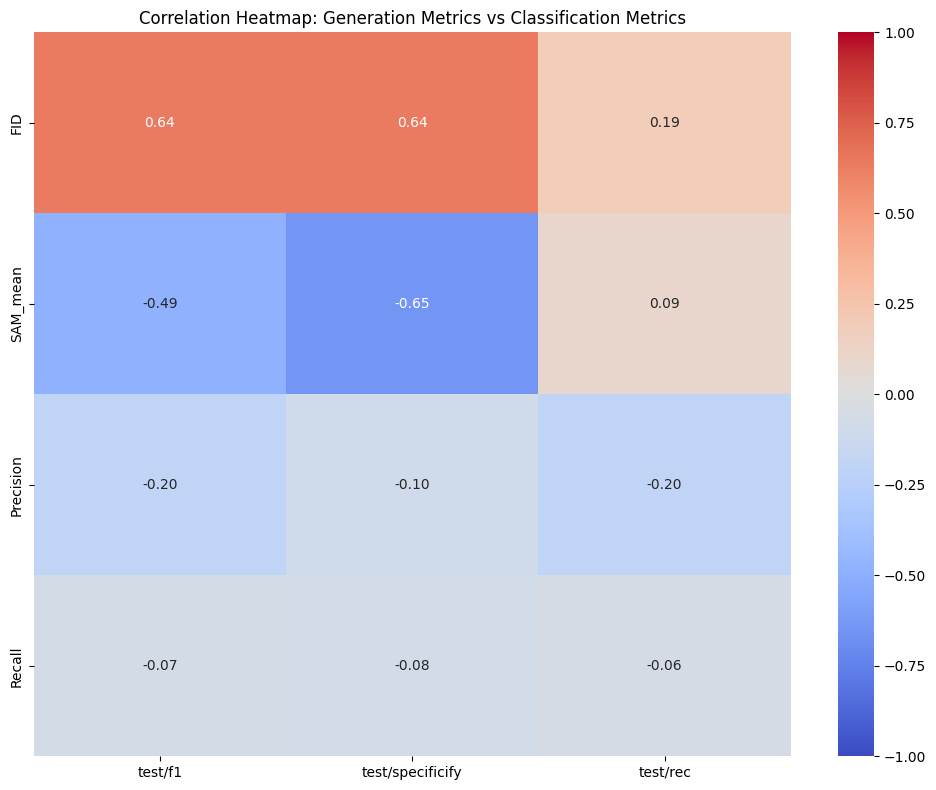

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for rows with classification results
synthetic_runs_clean = synthetic_runs_df.dropna(subset=['test/f1'])

# Define metrics
gen_metrics = ['FID', 'SAM_mean', 'Precision', 'Recall']
class_metrics = ['test/f1', 'test/specificify', 'test/rec']

# Calculate correlation matrix
# We only want the correlation between gen_metrics and class_metrics, 
# not within gen_metrics or within class_metrics for the heatmap (though the full matrix computes it all)
corr_matrix = synthetic_runs_clean[gen_metrics + class_metrics].corr()

# Slice the matrix to show only Gen vs Class correlations
gen_class_corr = corr_matrix.loc[gen_metrics, class_metrics]

# Plot 1: Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gen_class_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Correlation Heatmap: Generation Metrics vs Classification Metrics')
plt.tight_layout()
